In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
mnist = input_data.read_data_sets('MNIST_data',one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
# 计算每一次层网络
def add_layer(inputs, in_size, out_size, activation_function=None):
    weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    wx_b = tf.matmul(inputs, weights) + biases
    return wx_b if activation_function is None else activation_function(wx_b,)

xs = tf.placeholder(tf.float32, [None, 28*28])
ys = tf.placeholder(tf.float32, [None, 10])


def compute_accuracy(v_xs, v_ys):
    global prediction
    y_pre = sess.run(prediction, feed_dict={xs: v_xs})
    correct_prediction = tf.equal(tf.argmax(y_pre,1), tf.argmax(v_ys,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    return sess.run(accuracy, feed_dict={xs:v_xs, ys:v_ys})

def model_mnist(learning_rate, avf=None):
    layer1 = add_layer(xs, 784, 50, activation_function = avf)
    layer2 = add_layer(layer1, 50, 50, activation_function = avf)
    layer3 = add_layer(layer2, 50, 50, activation_function = avf)
    layer4 = add_layer(layer3, 50, 50, activation_function = avf)
    prediction = add_layer(layer4, 50, 10, activation_function = tf.nn.softmax)

    cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction), 
                                  reduction_indices=[1]))

    train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)
    return (layer1, prediction, train_step)

In [20]:
activation_functions = [tf.nn.tanh, tf.nn.sigmoid, tf.nn.relu]
models = {}
for avf in activation_functions:
    layer1, prediction, train_step = model_mnist(0.05,avf)

    with tf.Session() as sess:
    #     初始化我们创建的变量
        sess.run(tf.global_variables_initializer())
        steps = []
        accuracy_s = []
        for i in range(50000):
            batch_xs, batch_ys = mnist.train.next_batch(200)
    #         训练模型 
            sess.run(layer1,  feed_dict = {xs: batch_xs, ys: batch_ys})

            sess.run(train_step, feed_dict = {xs: batch_xs, ys:batch_ys})
            if i % 1000 ==0:
                accuracy = compute_accuracy(mnist.test.images, mnist.test.labels)
                accuracy_s.append(accuracy)
                steps.append(i)
                print ("step:",i,", ",accuracy)
    models[str(avf.__name__)] = {'steps':steps,'accuracy_s':accuracy_s}

step: 0 ,  0.0941
step: 1000 ,  0.5389
step: 2000 ,  0.6202
step: 3000 ,  0.6602
step: 4000 ,  0.6872
step: 5000 ,  0.7042
step: 6000 ,  0.7199
step: 7000 ,  0.7271
step: 8000 ,  0.7371
step: 9000 ,  0.7451
step: 10000 ,  0.7504
step: 11000 ,  0.7507
step: 12000 ,  0.7578
step: 13000 ,  0.7597
step: 14000 ,  0.7633
step: 15000 ,  0.7663
step: 16000 ,  0.7679
step: 17000 ,  0.7692
step: 18000 ,  0.7711
step: 19000 ,  0.7735
step: 20000 ,  0.7761
step: 21000 ,  0.7754
step: 22000 ,  0.7771
step: 23000 ,  0.7779
step: 24000 ,  0.779
step: 25000 ,  0.7806
step: 26000 ,  0.7811
step: 27000 ,  0.7842
step: 28000 ,  0.7829
step: 29000 ,  0.7832
step: 30000 ,  0.785
step: 31000 ,  0.7851
step: 32000 ,  0.786
step: 33000 ,  0.7851
step: 34000 ,  0.787
step: 35000 ,  0.7882
step: 36000 ,  0.7863
step: 37000 ,  0.7866
step: 38000 ,  0.7884
step: 39000 ,  0.7901
step: 40000 ,  0.7878
step: 41000 ,  0.7891
step: 42000 ,  0.7881
step: 43000 ,  0.7891
step: 44000 ,  0.7893
step: 45000 ,  0.7888
step:

In [21]:
models

{'relu': {'accuracy_s': [0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997],
  'steps': [0,
   1000,
   2000,
   3000,
   4000,
   5000,
   6000,
   7000,
   8000,
   9000,
   10000,
   11000,
   12000,
   13000,
   14000,
   15000,
   16000,
   17000,
 

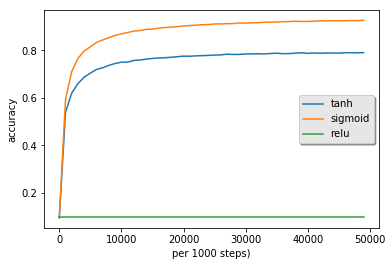

In [22]:
for avf in activation_functions:
    plt.plot(models[str(avf.__name__)]['steps'],models[str(avf.__name__)]['accuracy_s'],label=str(avf.__name__))
plt.ylabel('accuracy')
plt.xlabel('per 1000 steps)')
legend = plt.legend(loc='best',shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

In [23]:
learning_rate = [0.2, 0.1, 0.05,0.01]
models_lr = {}
for lr in learning_rate:
    layer1, prediction, train_step = model_mnist(lr,tf.nn.relu)

    with tf.Session() as sess:
    #     初始化我们创建的变量
        sess.run(tf.global_variables_initializer())
        steps = []
        accuracy_s = []
        for i in range(50000):
            batch_xs, batch_ys = mnist.train.next_batch(200)
    #         训练模型 
            sess.run(layer1,  feed_dict = {xs: batch_xs, ys: batch_ys})

            sess.run(train_step, feed_dict = {xs: batch_xs, ys:batch_ys})
            if i % 1000 ==0:
                accuracy = compute_accuracy(mnist.test.images, mnist.test.labels)
                accuracy_s.append(accuracy)
                steps.append(i)
                print ("step:",i,", ",accuracy)
    models_lr[str(lr)] = {'steps':steps,'accuracy_s':accuracy_s}

step: 0 ,  0.098
step: 1000 ,  0.098
step: 2000 ,  0.098
step: 3000 ,  0.098
step: 4000 ,  0.098
step: 5000 ,  0.098
step: 6000 ,  0.098
step: 7000 ,  0.098
step: 8000 ,  0.098
step: 9000 ,  0.098
step: 10000 ,  0.098
step: 11000 ,  0.098
step: 12000 ,  0.098
step: 13000 ,  0.098
step: 14000 ,  0.098
step: 15000 ,  0.098
step: 16000 ,  0.098
step: 17000 ,  0.098
step: 18000 ,  0.098
step: 19000 ,  0.098
step: 20000 ,  0.098
step: 21000 ,  0.098
step: 22000 ,  0.098
step: 23000 ,  0.098
step: 24000 ,  0.098
step: 25000 ,  0.098
step: 26000 ,  0.098
step: 27000 ,  0.098
step: 28000 ,  0.098
step: 29000 ,  0.098
step: 30000 ,  0.098
step: 31000 ,  0.098
step: 32000 ,  0.098
step: 33000 ,  0.098
step: 34000 ,  0.098
step: 35000 ,  0.098
step: 36000 ,  0.098
step: 37000 ,  0.098
step: 38000 ,  0.098
step: 39000 ,  0.098
step: 40000 ,  0.098
step: 41000 ,  0.098
step: 42000 ,  0.098
step: 43000 ,  0.098
step: 44000 ,  0.098
step: 45000 ,  0.098
step: 46000 ,  0.098
step: 47000 ,  0.098
step:

In [24]:
models_lr

{'0.01': {'accuracy_s': [0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997,
   0.097999997],
  'steps': [0,
   1000,
   2000,
   3000,
   4000,
   5000,
   6000,
   7000,
   8000,
   9000,
   10000,
   11000,
   12000,
   13000,
   14000,
   15000,
   16000,
   17000,
 

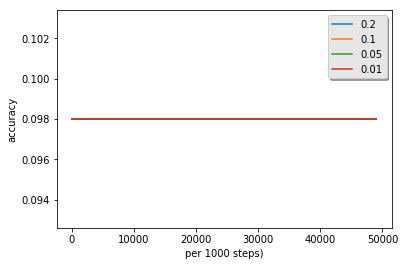

In [25]:
for lr in learning_rate:
    plt.plot(models_lr[str(lr)]['steps'],models_lr[str(lr)]['accuracy_s'],label=str(lr))
plt.ylabel('accuracy')
plt.xlabel('per 1000 steps)')
legend = plt.legend(loc='best',shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

In [ ]:
# 计算每一次层网络
def add_layer(inputs, in_size, out_size, activation_function=None):
    weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    wx_b = tf.matmul(inputs, weights) + biases
    return wx_b if activation_function is None else activation_function(wx_b,)

xs = tf.placeholder(tf.float32, [None, 28*28])
ys = tf.placeholder(tf.float32, [None, 10])


def compute_accuracy(v_xs, v_ys):
    global prediction
    y_pre = sess.run(prediction, feed_dict={xs: v_xs})
    correct_prediction = tf.equal(tf.argmax(y_pre,1), tf.argmax(v_ys,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    return sess.run(accuracy, feed_dict={xs:v_xs, ys:v_ys})

def model_mnist(learning_rate, avf=None):
    layer1 = add_layer(xs, 784, 50, activation_function = avf)
    layer2 = add_layer(layer1, 50, 50, activation_function = avf)
    layer3 = add_layer(layer2, 50, 50, activation_function = avf)
    layer4 = add_layer(layer3, 50, 50, activation_function = avf)
    prediction = add_layer(layer4, 50, 10, activation_function = tf.nn.softmax)

    cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction), 
                                  reduction_indices=[1]))

    train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)
    return (layer1, prediction, train_step)